##Importiung the required libraries

In [ ]:
import nltk
nltk.download("stopwords")
print(stopwords.words('english'))
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('gutenberg')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [149]:

#basic libraries
import math
import nltk
import re
import csv
import random
import pandas as pd
import wordcloud
import sklearn
import numpy as np

#for pre-processing
from csv import writer
from urllib import request
from random import shuffle
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer# diff between TfidfTransformer & TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Machine Learning methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import SGDClassifier

#For Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report,accuracy_score, f1_score
from sklearn.metrics.pairwise import DataConversionWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
#from sklearn import svm, ensemble, naive_bayes, neighbors

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer


# 1 - Prepare the Data and Text Preprocessing

In [150]:
def read_book(book, index, Author, label):
    toknize_book = regexp_tokenize(book, r'(\w{2,})[\s]')
    
    stop_words = set(stopwords.words('english'))
    
    toknize_book = [word for word in toknize_book if word.lower() not in stop_words]
    
    list_of_part = []
    for i in range(200):
        start = random.randint(0, len(toknize_book) - 100)
        list_of_part.append(' '.join(toknize_book[start:start+100]))
    
    df = pd.DataFrame({"index": index, "Authors": Author, "label": label, "partitions": list_of_part})
    return df

In [151]:

url1 = "https://www.gutenberg.org/files/28558/28558-0.txt"           #The Ancient History of the Egyptians, Carthaginians, Assyrians 
url2 = "https://www.gutenberg.org/cache/epub/28876/pg28876.txt"      #History of Egypt, Chaldæa, Syria, Babylonia, and Assyria 
url3 = "https://www.gutenberg.org/cache/epub/17321/pg17321.txt"      #History of Egypt, Chaldea, Syria, Babylonia, and Assyria in the Light of Recent 
url4 = "https://www.gutenberg.org/files/54280/54280-0.txt"           #Ancient Egyptian, Assyrian, and Persian costumes and decorations  
url5 = "https://www.gutenberg.org/files/15663/15663-0.txt"           #Ancient Egypt by Arthur Gilman 

urls = [url1 ,url2 ,url3, url4 ,url5]
label = [ 'a' ,'b' ,'c','d' ,'e']
Authors =["Charles Rollin","Maspero","Harry Reginald","Hornblower","Arthur Gilman "]
def datacreat(u):
    # Open the URL and read the contents
    response = request.urlopen(u)
    record = response.read().decode('utf8' ).lower()
    return record
books=[]
for i in range(len(urls)):
  df=read_book(datacreat(urls[i]),i,Authors[i],label[i])
  books.append(df)
df_books=pd.concat(books)



In [152]:
# shuffle the rows
data = df_books.sample(frac=1)


In [153]:
data

,index,Authors,label,partitions
106,0,Charles Rollin,a,defects investing person different considered ...
121,0,Charles Rollin,a,making bear blame punished sent passed remaind...
183,0,Charles Rollin,a,thirty greatest breadth egypt alexandria fifty...
39,3,Hornblower,d,immediate access full project tm license must ...
125,3,Hornblower,d,robe 19 robe draped woman 20 11 two skirts cap...
...,...,...,...,...
158,1,Maspero,b,archive foundation created provide secure perm...
178,0,Charles Rollin,a,nearer approached riches egypt depended inunda...
43,2,Harry Reginald,c,thus robbed extraordinary arrival léon heuzey ...
159,4,Arthur Gilman,e,took refuge nile dragged miserable existence a...


In [154]:
#to remove dates, years|
pattern = r'\d{4}-\d{2}-\d{2}|\d+'
data['partitions'] = data['partitions'].str.replace(pattern, '', regex=True)
data.tail()

,index,Authors,label,partitions
158,1,Maspero,b,archive foundation created provide secure perm...
178,0,Charles Rollin,a,nearer approached riches egypt depended inunda...
43,2,Harry Reginald,c,thus robbed extraordinary arrival léon heuzey ...
159,4,Arthur Gilman,e,took refuge nile dragged miserable existence a...
145,0,Charles Rollin,a,order might time send agreed grant upon condit...


In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
import pandas as pd
from langdetect import detect


# Function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'  # Return True if the language is English, False otherwise
    except:
        return False

# Filter out non-English language data
data= data[data['partitions'].apply(detect_language)]

# Print the filtered dataframe
print(data)


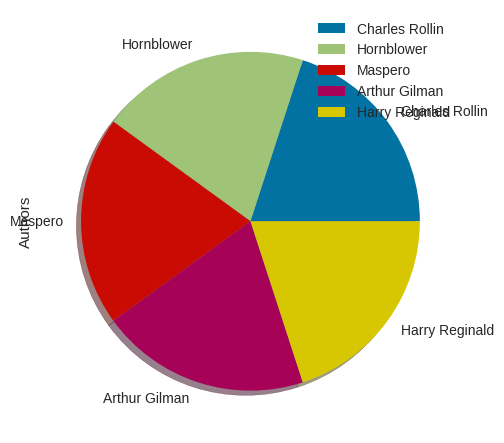

In [155]:
#showing the authors
data['Authors'].value_counts().plot.pie( shadow = True)
plt.legend()
plt.show()

<Axes: title={'center': 'Top 20 words'}, xlabel='word'>

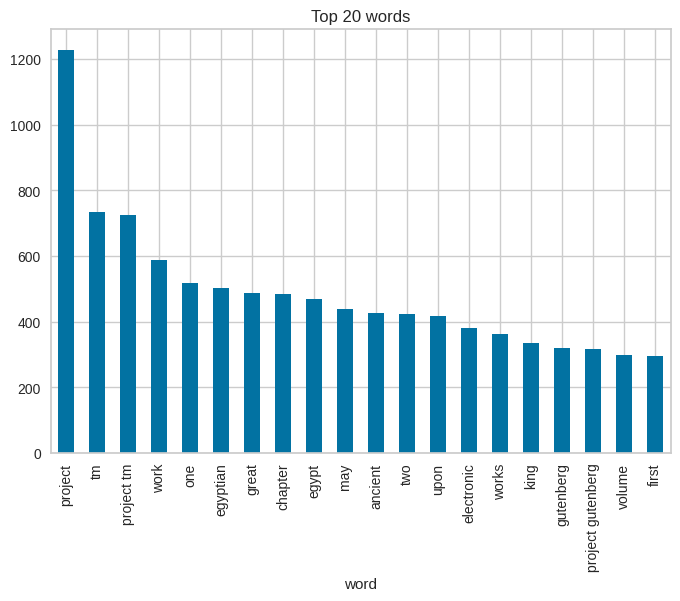

In [157]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['partitions'], 20)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words')

<Axes: xlabel='Authors', ylabel='count'>

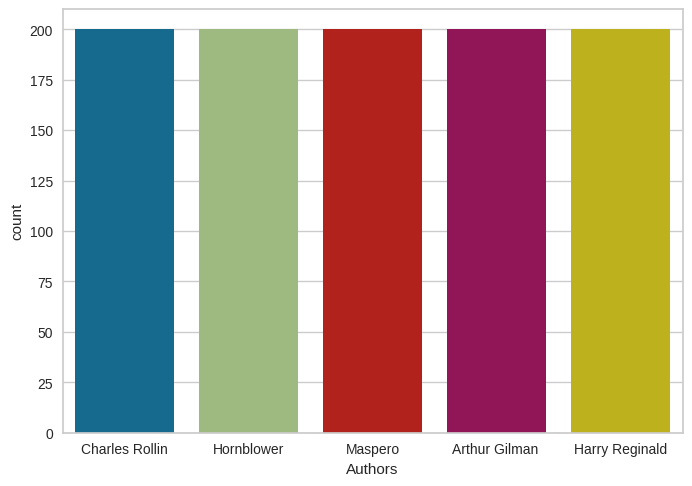

In [158]:

sns.countplot(x=data['Authors'])


 The most frequent 50 words of book a



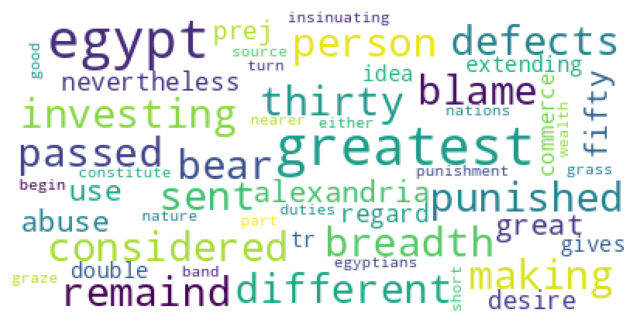


 The most frequent 50 words of book d



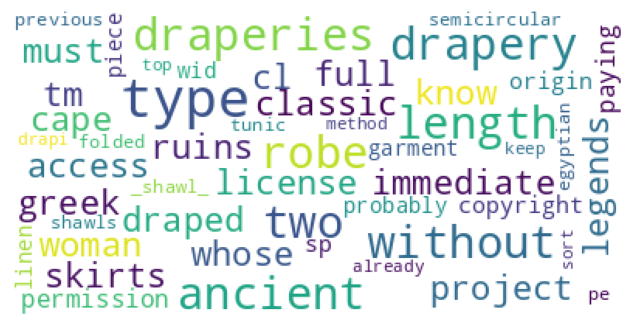


 The most frequent 50 words of book b



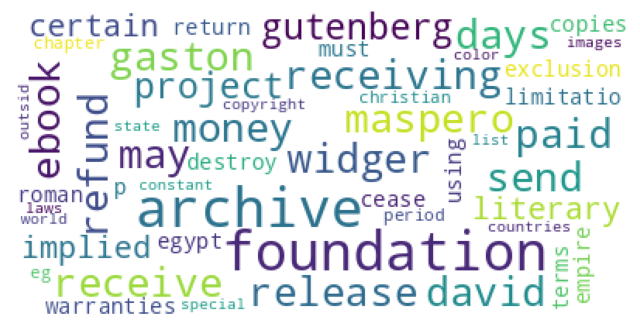


 The most frequent 50 words of book e



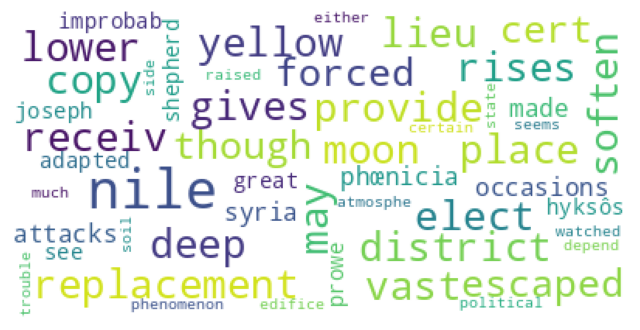


 The most frequent 50 words of book c



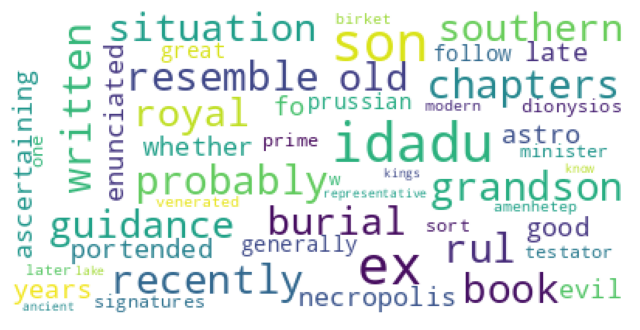

In [159]:
for label in data['label'].unique():
  books = data[data["label"]==label]["partitions"]

  #wordcloud 
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [161]:
X = data['partitions']
y = data['index']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42,shuffle=True)

print(X_train.shape), print(y_train.shape)

print(X_test.shape), print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


(None, None)

In [163]:
#BOW
cv=CountVectorizer()
X_train_bow = cv.fit_transform(X_train)
X_test_bow = cv.transform(X_test)

#N-Gram
cvn= CountVectorizer(ngram_range=(1,2))
X_train_n = cvn.fit_transform(X_train)
X_test_n = cvn.transform(X_test)

#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_tfidf = tfidf_vectorizer.transform(X_test) 


In [167]:
#BOW
bow = cv.fit_transform(data['partitions'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names_out())
bow_df.to_csv('bow_df.csv', index=False)
bow_df

,__,_aberdeen,_about_,_ad,_all,_arab,_arar,_besh_,_bethels_,_betju_,...,ἐστι,ἔρωτος,ἔχω,ἡμερῶν,ὄλβια,ὄντων,ὅλον,ὅτι,ὡς,ῥαψωδοι
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
#N_grams
n_grams = cvn.fit_transform(data['partitions'])
n_grams_df = pd.DataFrame(n_grams.toarray(), columns=cvn.get_feature_names_out())
n_grams_df.to_csv('n_grams_df.csv', index=False)
n_grams_df

,__,__ longinquo,__ objects,_aberdeen,_aberdeen free,_about_,_about_ special,_ad,_ad part,_ad persons,...,ὄντων,ὄντων ἀξιον,ὅλον,ὅλον _in,ὅτι,ὅτι τοῦ,ὡς,ὡς τῶν,ῥαψωδοι,ῥαψωδοι appointed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
#TF-IDF
tf_idf = tfidf_vectorizer.fit_transform(data['partitions'])
tf_idf_df = pd.DataFrame(tf_idf .toarray(), columns=cv.get_feature_names_out())
tf_idf_df.to_csv('tf_idf_df.csv', index=False)
tf_idf_df

,__,_aberdeen,_about_,_ad,_all,_arab,_arar,_besh_,_bethels_,_betju_,...,ἐστι,ἔρωτος,ἔχω,ἡμερῶν,ὄλβια,ὄντων,ὅλον,ὅτι,ὡς,ῥαψωδοι
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
def plot_TSNE(data,labels):
    tsne = TSNEVisualizer()
    tsne.fit(data,labels)
    plt.xlabel("TSNE x")
    plt.ylabel("TSNE y")
    tsne.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


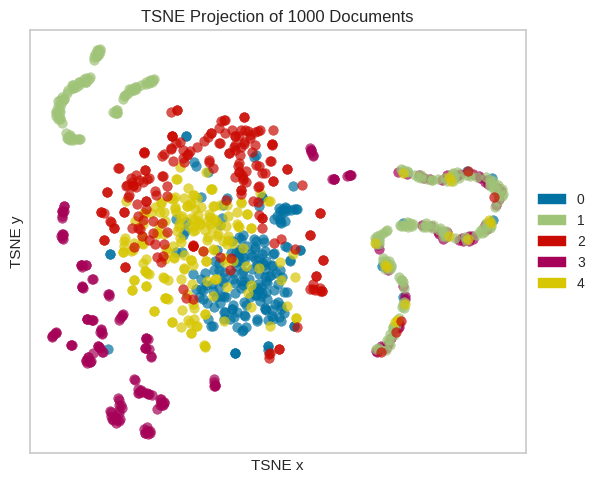

In [171]:
plot_TSNE(bow_df,y)

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


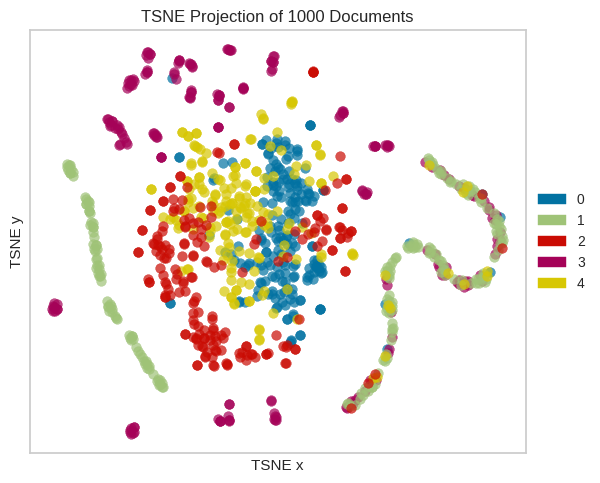

In [172]:
plot_TSNE(n_grams_df ,y)

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


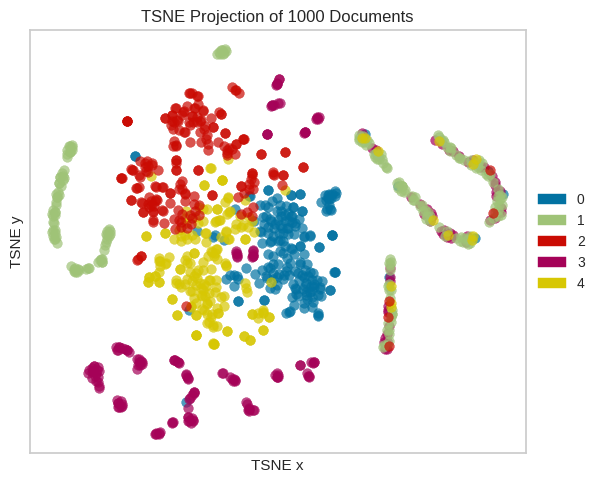

In [173]:
plot_TSNE(tf_idf_df,y)

In [174]:
y_test.shape
y_test = y_test.reshape(200,1)

##ML models based on BOW

Model: SVM
Training Accuracy: 0.9325
Testing Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.72      0.97      0.83        39
           2       1.00      0.85      0.92        41
           3       0.94      0.77      0.85        43
           4       0.87      0.81      0.84        42

    accuracy                           0.87       200
   macro avg       0.89      0.88      0.87       200
weighted avg       0.89      0.87      0.87       200

ROC_AUC: 0.9636884854276159


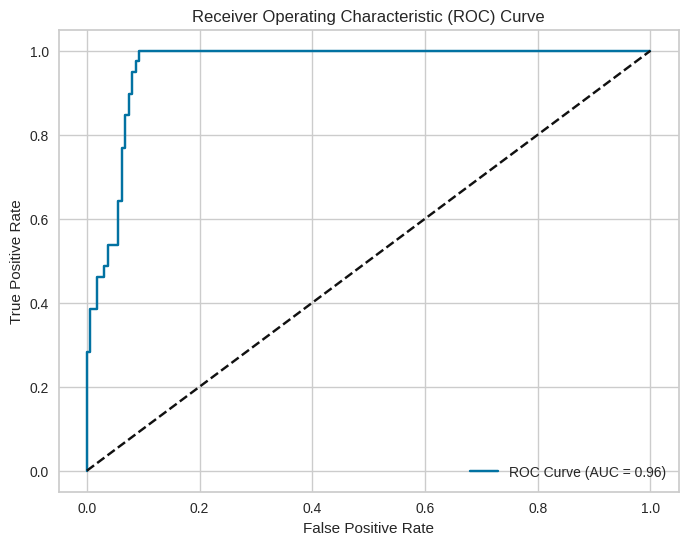

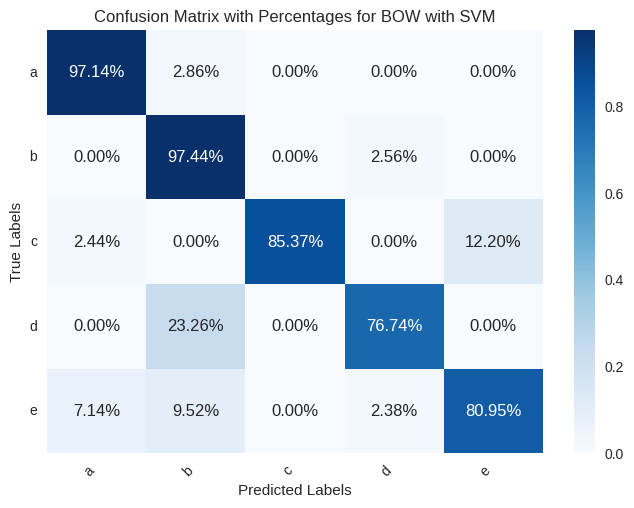


Model: Random Forest
Training Accuracy: 0.99875
Testing Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        35
           1       0.73      0.77      0.75        39
           2       0.97      0.88      0.92        41
           3       0.81      0.79      0.80        43
           4       0.84      0.76      0.80        42

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.82      0.83       200

ROC_AUC: 0.9726867335562988


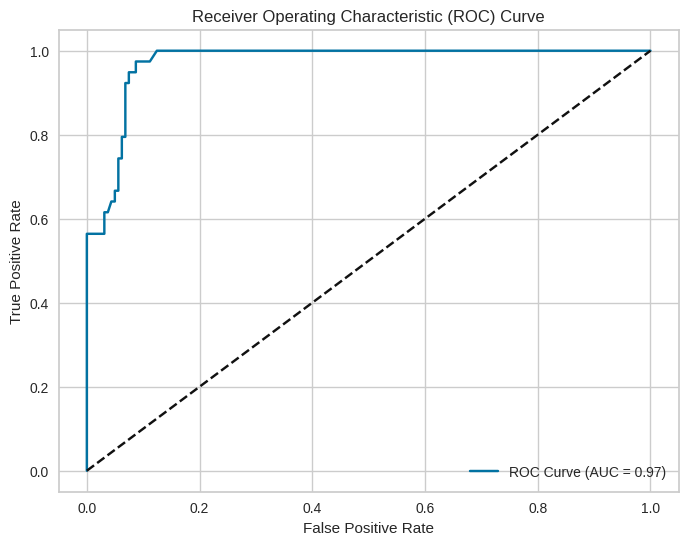

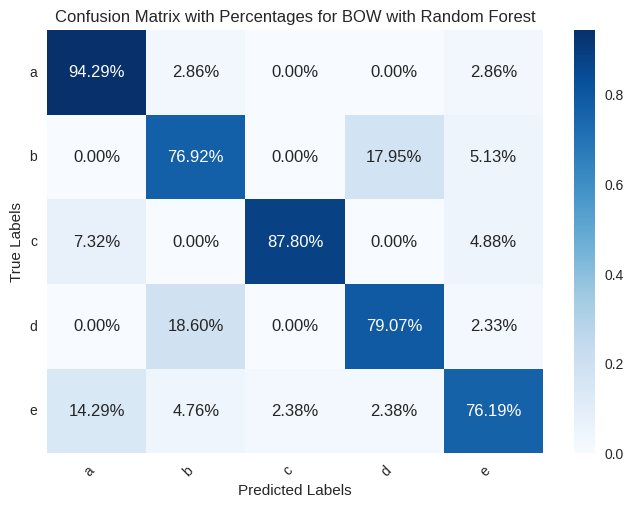


Model: Naïve Bayes
Training Accuracy: 0.925
Testing Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.71      1.00      0.83        39
           2       0.95      0.98      0.96        41
           3       1.00      0.77      0.87        43
           4       1.00      0.86      0.92        42

    accuracy                           0.91       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.91      0.91       200

ROC_AUC: 0.9490364707756013


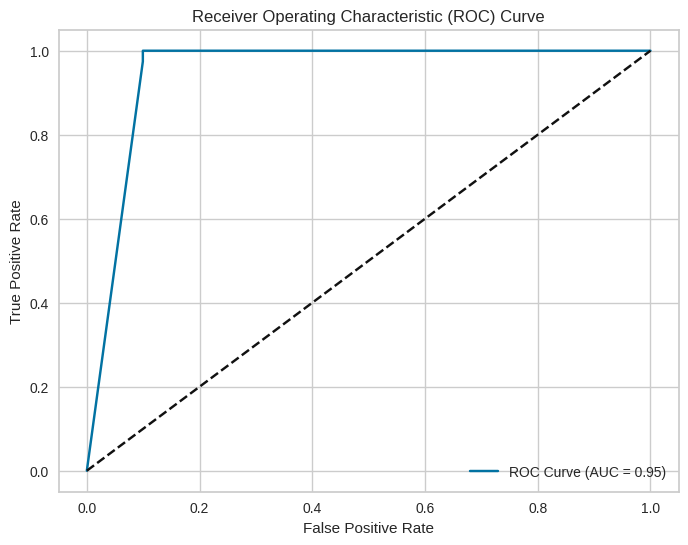

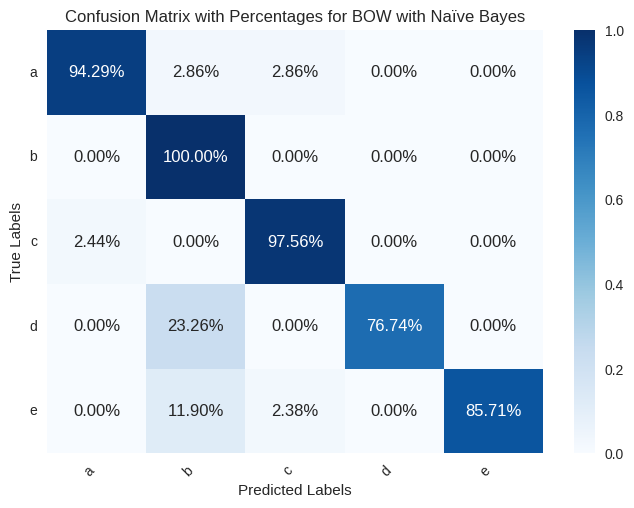


Model: k-Nearest Neighbor
Training Accuracy: 0.83125
Testing Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.55      0.86      0.67        35
           1       0.74      1.00      0.85        39
           2       1.00      0.39      0.56        41
           3       0.97      0.79      0.87        43
           4       0.71      0.69      0.70        42

    accuracy                           0.74       200
   macro avg       0.79      0.75      0.73       200
weighted avg       0.80      0.74      0.73       200

ROC_AUC: 0.9683070552635771


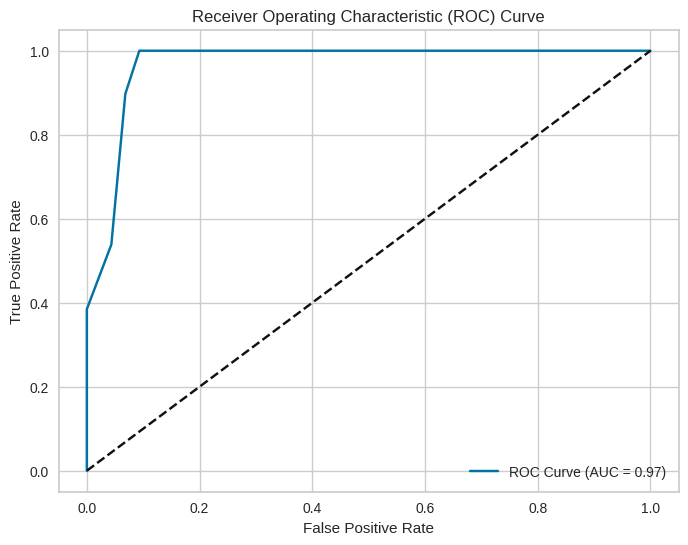

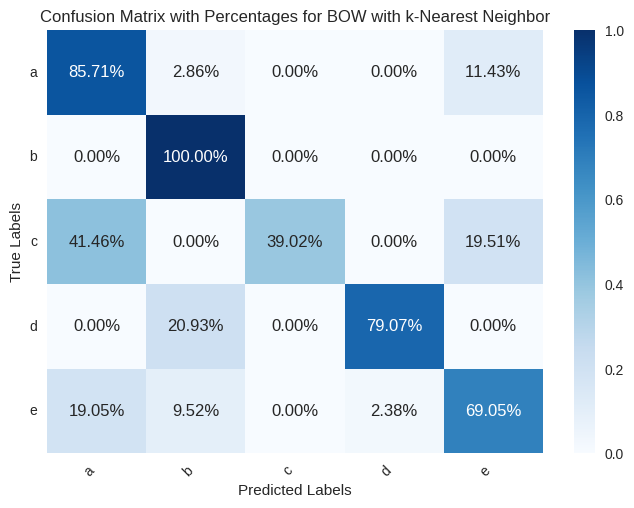


Model: XG-Boost
Training Accuracy: 0.99875
Testing Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.79      0.67      0.72        39
           2       0.92      0.83      0.87        41
           3       0.76      0.86      0.80        43
           4       0.73      0.76      0.74        42

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.79       200

ROC_AUC: 0.9733237776716037


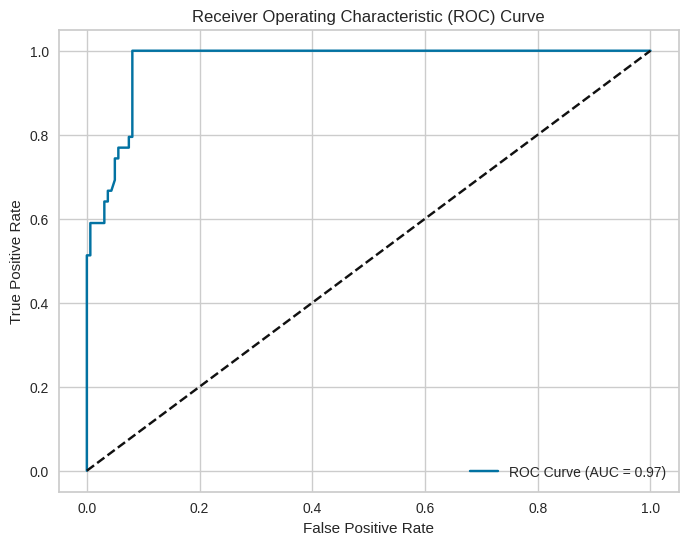

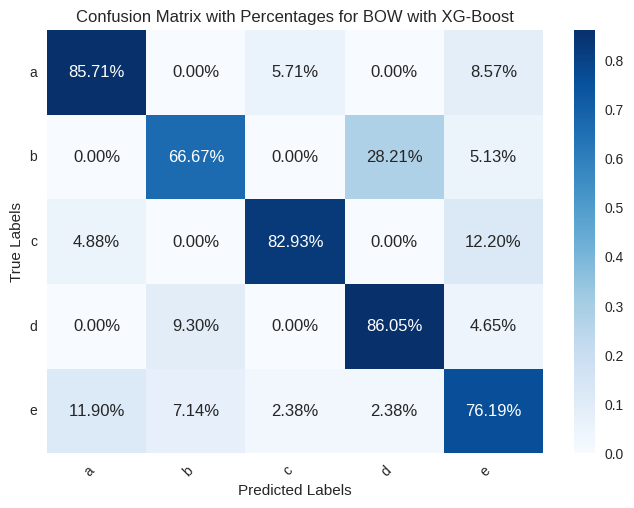


Model: SGD
Training Accuracy: 0.9825
Testing Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.77      0.69      0.73        39
           2       0.97      0.90      0.94        41
           3       0.74      0.81      0.78        43
           4       0.91      0.93      0.92        42

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

ROC_AUC: 0.969581143494187


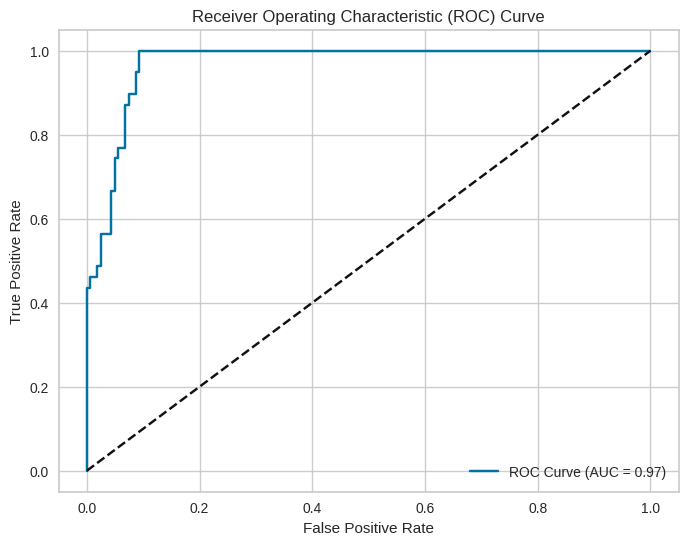

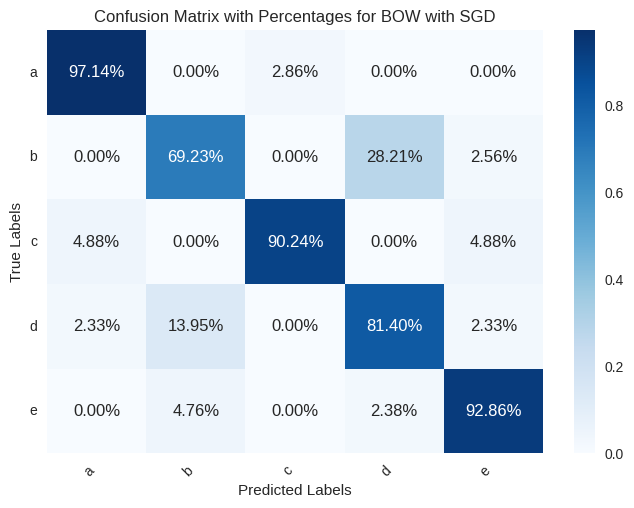

In [175]:

from sklearn.calibration import CalibratedClassifierCV
base_model=SGDClassifier()
sgdmodel=CalibratedClassifierCV(base_model)
models = [
    ('SVM', svm.SVC(probability=True)),
    ('Random Forest', ensemble.RandomForestClassifier()),
    ('Naïve Bayes', naive_bayes.MultinomialNB()),
    ('k-Nearest Neighbor', neighbors.KNeighborsClassifier()),
    ('XG-Boost', xgb.XGBClassifier()),
    ('SGD',sgdmodel)
]

# Iterate over the models
for name, model in models:
    # Train the model
    model.fit(X_train_bow, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(X_train_bow)
    y_pred = model.predict(X_test_bow)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the model name, accuracy, and confusion matrix
    print('Model:', name)
    print('Training Accuracy:', accuracy_train)
    print('Testing Accuracy:', accuracy)
    # Generate the classification report
    report = classification_report(y_test, y_pred)
    print(report)

    y_prob = model.predict_proba(X_test_bow)[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(y_test, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC:', roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    classes = ['a','b','c','d','e']
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the confusion matrix with percentages
    sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.2%', xticklabels=classes, yticklabels=classes, ax=ax)
    # Customize the plot
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix with Percentages for BOW with '+ name)
    ax.xaxis.set_ticklabels(classes, rotation=45, ha='right')
    ax.yaxis.set_ticklabels(classes, rotation=0)
    plt.show()
    print()

##ML models based on N-grams

Model: SVM
Traing_Accuracy: 0.93875
Testing_Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        35
           1       0.72      0.97      0.83        39
           2       1.00      0.56      0.72        41
           3       0.94      0.77      0.85        43
           4       0.82      0.76      0.79        42

    accuracy                           0.80       200
   macro avg       0.83      0.81      0.80       200
weighted avg       0.84      0.80      0.80       200

ROC_AUC: 0.967670011148272


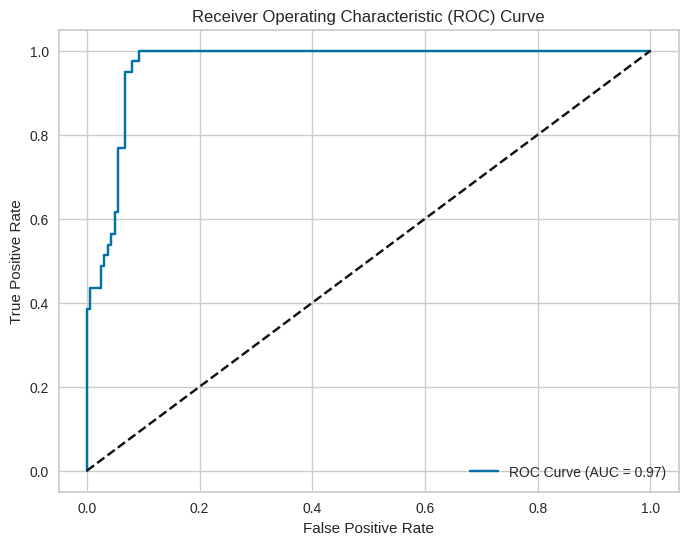

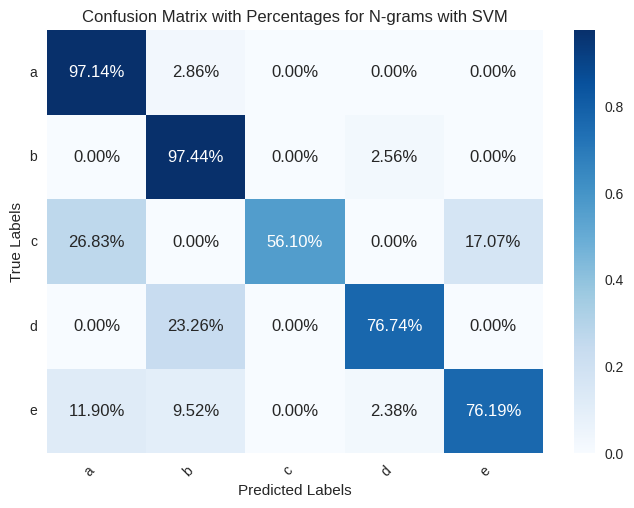


Model: Random Forest
Traing_Accuracy: 0.99875
Testing_Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        35
           1       0.74      0.79      0.77        39
           2       0.94      0.83      0.88        41
           3       0.81      0.79      0.80        43
           4       0.86      0.76      0.81        42

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.82      0.82       200

ROC_AUC: 0.9742793438445612


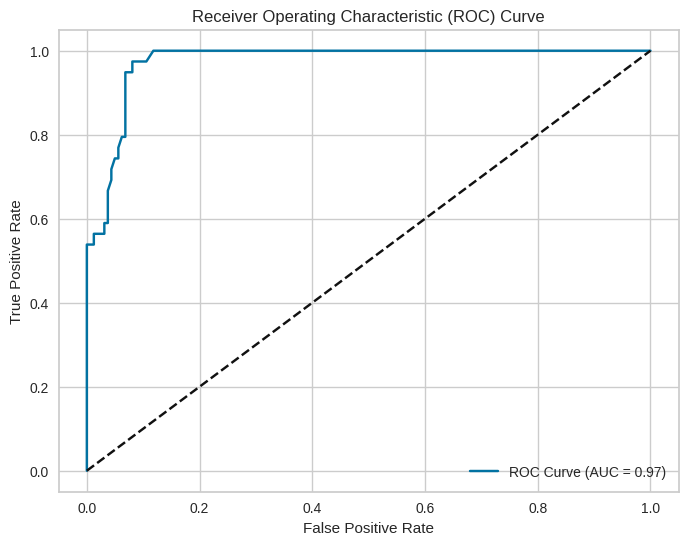

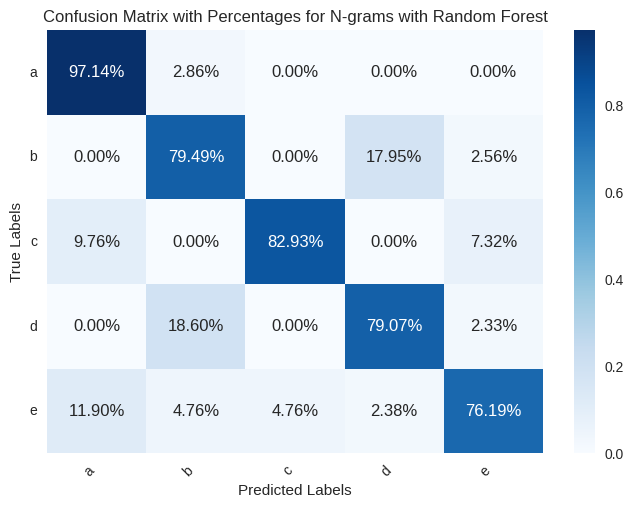


Model: Naïve Bayes
Traing_Accuracy: 0.92625
Testing_Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.71      1.00      0.83        39
           2       0.95      1.00      0.98        41
           3       1.00      0.77      0.87        43
           4       1.00      0.86      0.92        42

    accuracy                           0.91       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.91      0.91       200

ROC_AUC: 0.9490364707756013


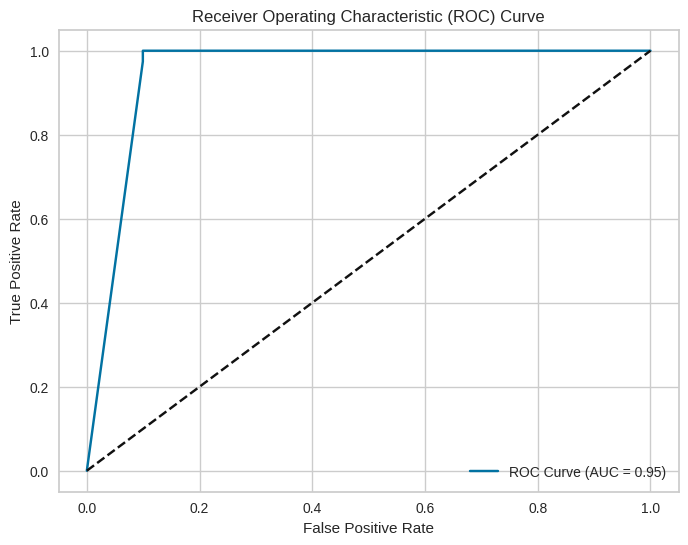

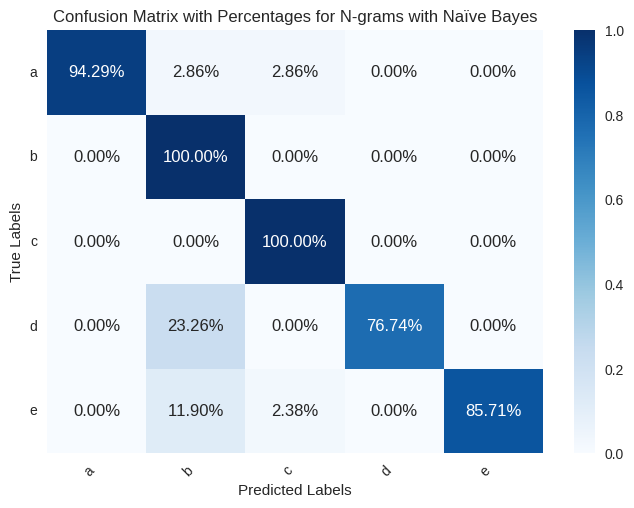


Model: k-Nearest Neighbor
Traing_Accuracy: 0.78875
Testing_Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.38      0.97      0.55        35
           1       0.74      1.00      0.85        39
           2       1.00      0.27      0.42        41
           3       0.97      0.79      0.87        43
           4       0.83      0.24      0.37        42

    accuracy                           0.64       200
   macro avg       0.78      0.65      0.61       200
weighted avg       0.80      0.64      0.61       200

ROC_AUC: 0.9707756012103839


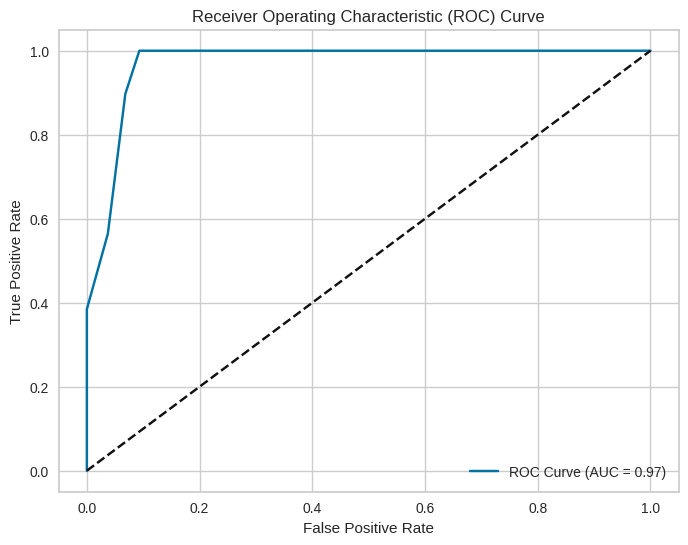

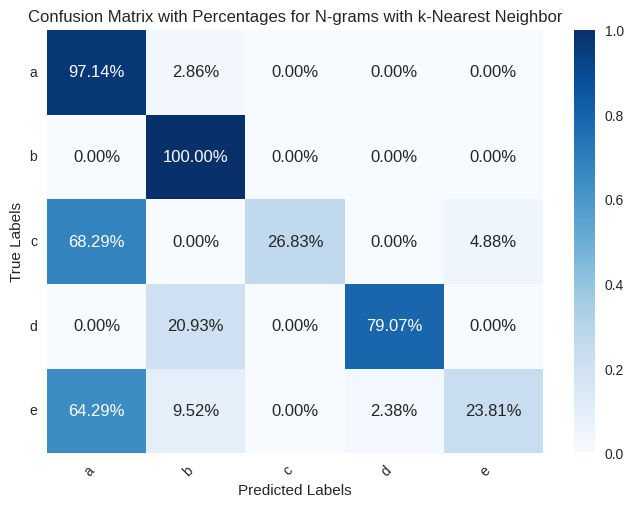


Model: XG-Boost
Traing_Accuracy: 0.99875
Testing_Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.80      0.72      0.76        39
           2       0.92      0.85      0.89        41
           3       0.79      0.86      0.82        43
           4       0.77      0.79      0.78        42

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

ROC_AUC: 0.9757126931039974


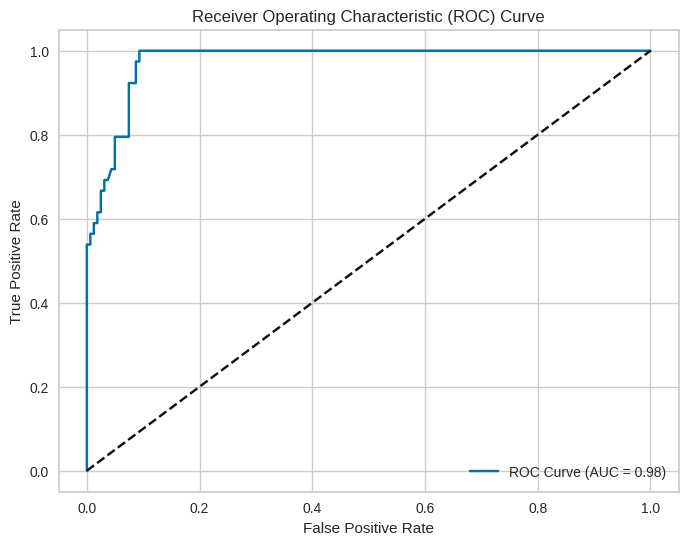

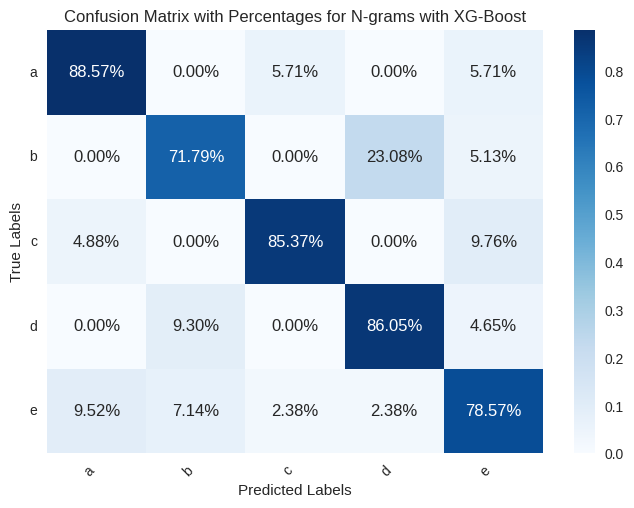


Model: SGD
Traing_Accuracy: 0.99125
Testing_Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.77      0.69      0.73        39
           2       0.97      0.95      0.96        41
           3       0.75      0.84      0.79        43
           4       0.90      0.90      0.90        42

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

ROC_AUC: 0.9718107978977544


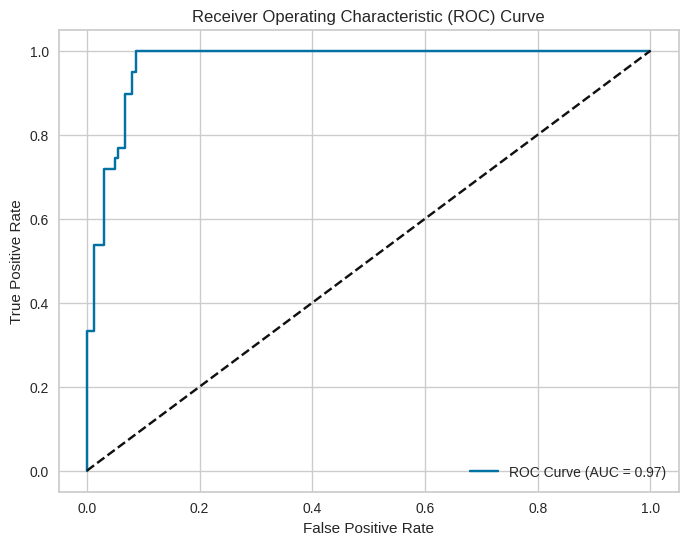

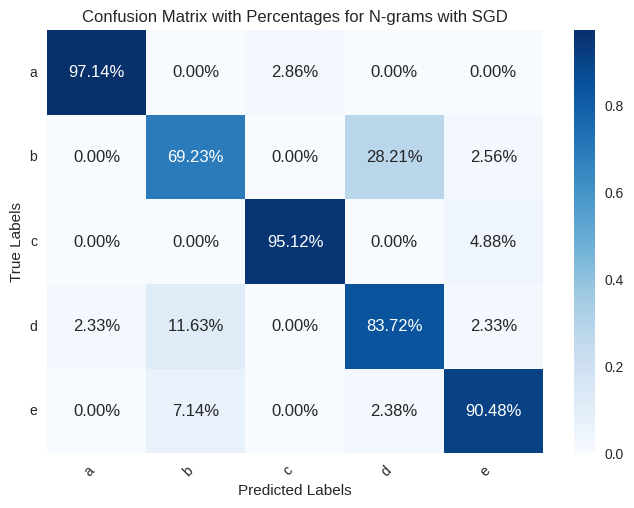

In [177]:
base_model=SGDClassifier()
sgdmodel=CalibratedClassifierCV(base_model)
models = [
    ('SVM', svm.SVC(probability=True)),
    ('Random Forest', ensemble.RandomForestClassifier()),
    ('Naïve Bayes', naive_bayes.MultinomialNB()),
    ('k-Nearest Neighbor', neighbors.KNeighborsClassifier()),
    ('XG-Boost', xgb.XGBClassifier()),
    ('SGD',sgdmodel)
]

# Iterate over the models
for name, model in models:
    # Train the model
    model.fit(X_train_n, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(X_train_n)
    y_pred = model.predict(X_test_n)

    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the model name, accuracy, and confusion matrix
    
    print('Model:', name)
    print('Traing_Accuracy:', accuracy_train)
    print('Testing_Accuracy:', accuracy)
    # Generate the classification report
    report = classification_report(y_test, y_pred)

    print(report)
    y_prob = model.predict_proba(X_test_n)[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(y_test, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC:', roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    classes = ['a','b','c','d','e']
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the confusion matrix with percentages
    sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.2%', xticklabels=classes, yticklabels=classes, ax=ax)
    # Customize the plot
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix with Percentages for N-grams with '+ name)
    ax.xaxis.set_ticklabels(classes, rotation=45, ha='right')
    ax.yaxis.set_ticklabels(classes, rotation=0)
    plt.show()
    print()

##ML models based on TF-IDF

Model: SVM
Accuracy: 0.93375
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.72      0.97      0.83        39
           2       1.00      0.90      0.95        41
           3       0.94      0.77      0.85        43
           4       0.95      0.86      0.90        42

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.89      0.89       200

ROC_AUC: 0.9641662685140946


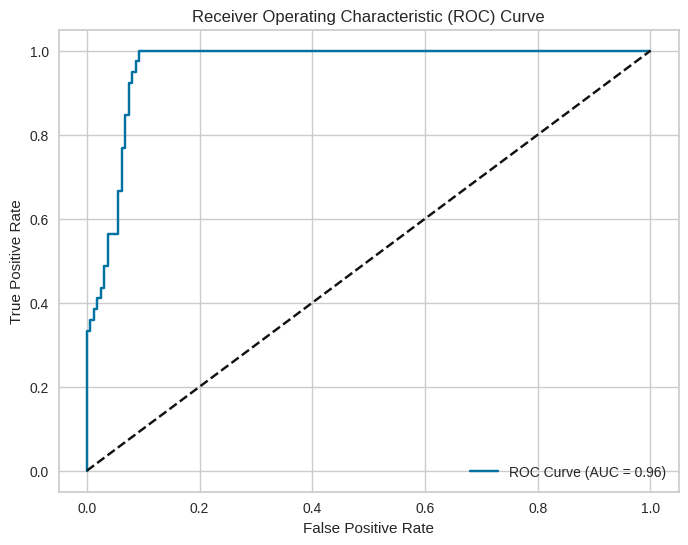

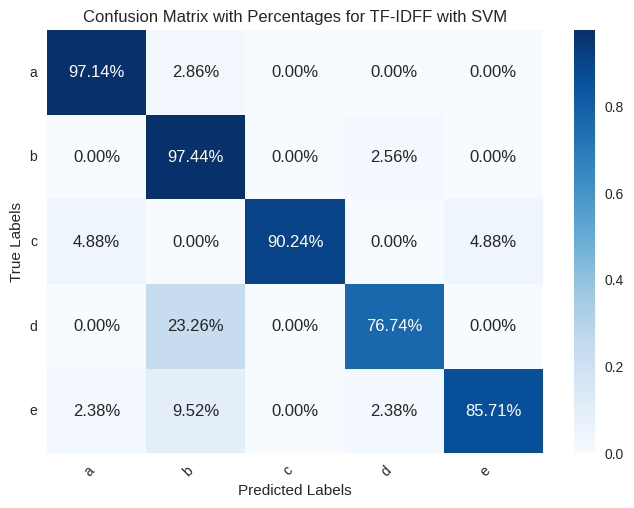


Model: Random Forest
Accuracy: 0.99875
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.77      0.77      0.77        39
           2       0.92      0.85      0.89        41
           3       0.83      0.81      0.82        43
           4       0.82      0.74      0.78        42

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

ROC_AUC: 0.9765089982481286


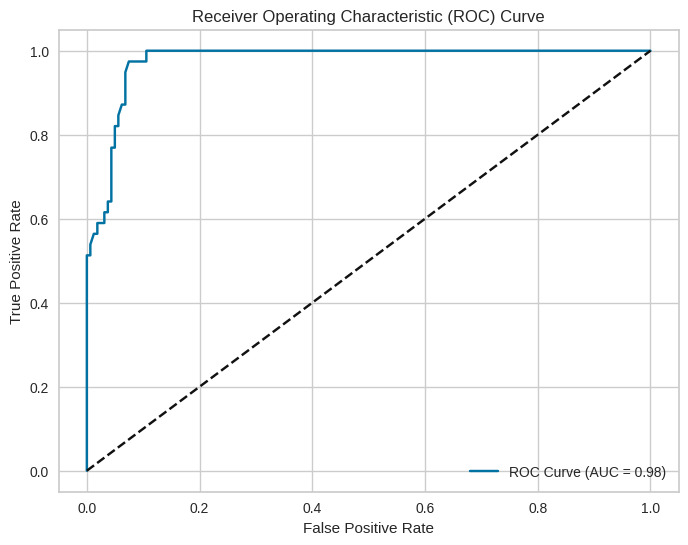

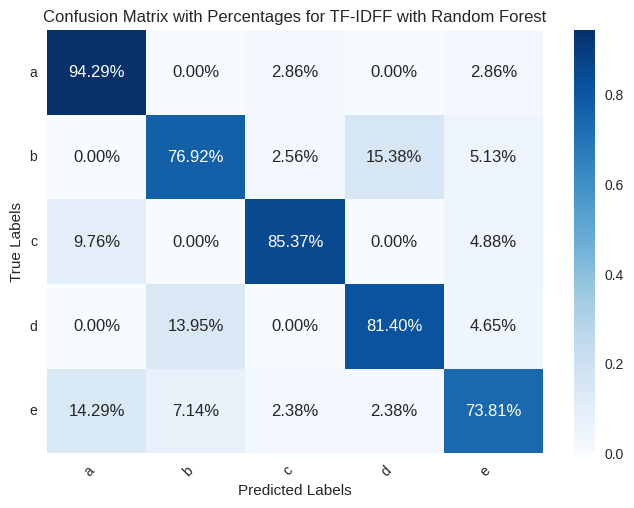


Model: Naïve Bayes
Accuracy: 0.92375
Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.71      1.00      0.83        39
           2       0.95      0.98      0.96        41
           3       1.00      0.77      0.87        43
           4       1.00      0.86      0.92        42

    accuracy                           0.91       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.91      0.91       200

ROC_AUC: 0.9697404045230132


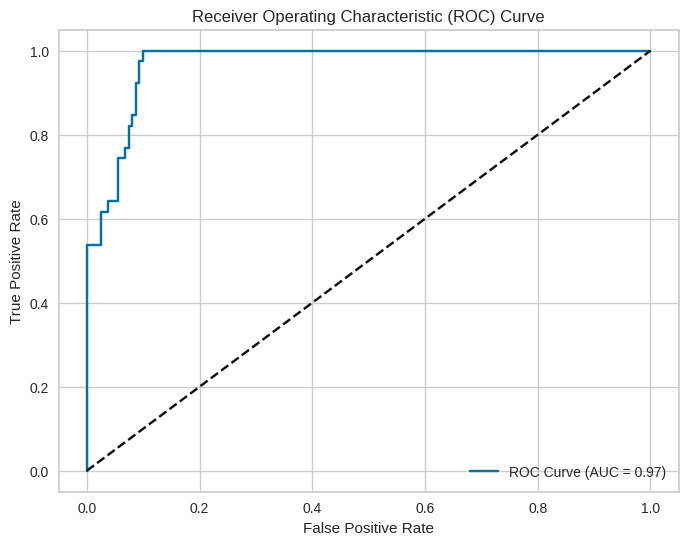

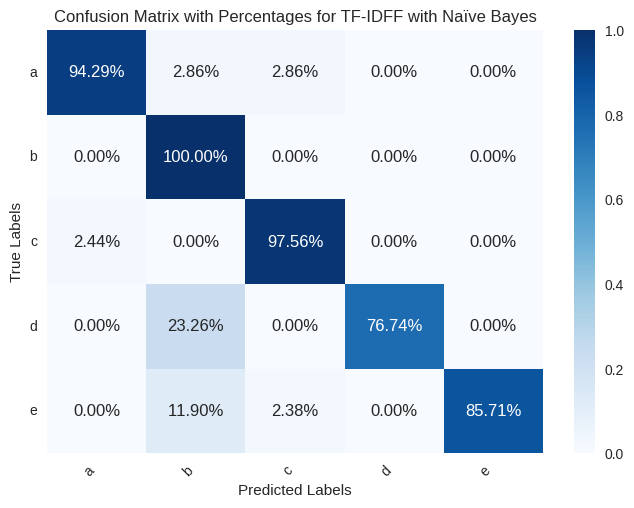


Model: k-Nearest Neighbor
Accuracy: 0.89625
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        35
           1       0.71      1.00      0.83        39
           2       0.95      0.93      0.94        41
           3       0.97      0.79      0.87        43
           4       0.97      0.76      0.85        42

    accuracy                           0.88       200
   macro avg       0.90      0.88      0.88       200
weighted avg       0.90      0.88      0.88       200

ROC_AUC: 0.9627329192546583


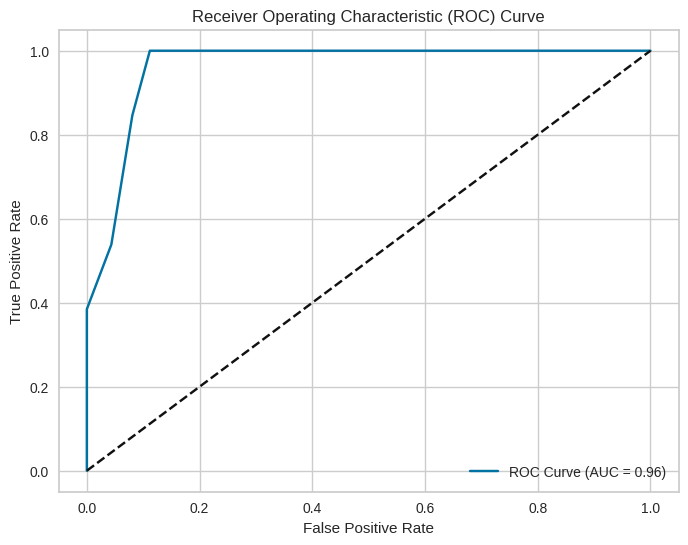

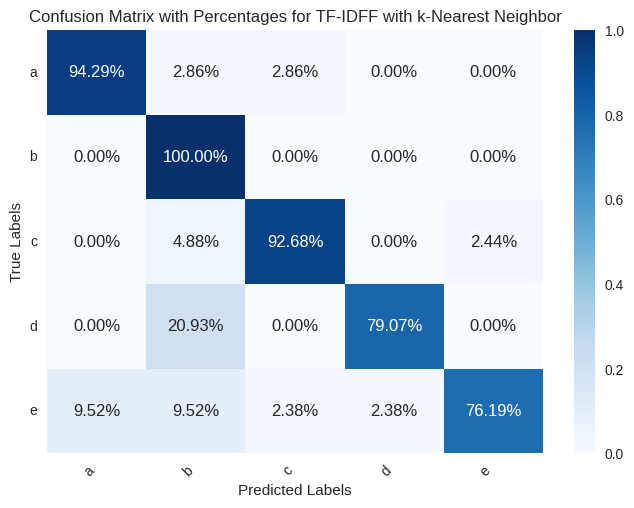


Model: XG-Boost
Accuracy: 0.99875
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.81      0.77      0.79        39
           2       0.89      0.83      0.86        41
           3       0.86      0.84      0.85        43
           4       0.70      0.76      0.73        42

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

ROC_AUC: 0.9775441949354994


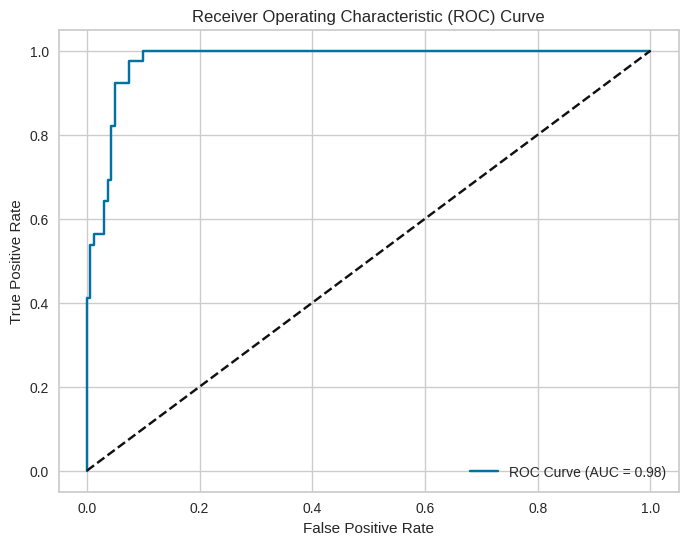

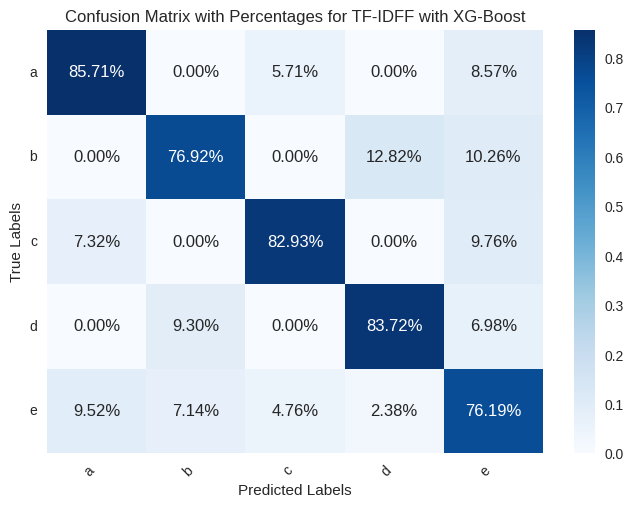


Model: SGD
Accuracy: 0.97
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.75      0.77      0.76        39
           2       0.97      0.95      0.96        41
           3       0.77      0.79      0.78        43
           4       0.93      0.90      0.92        42

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

ROC_AUC: 0.9676700111482721


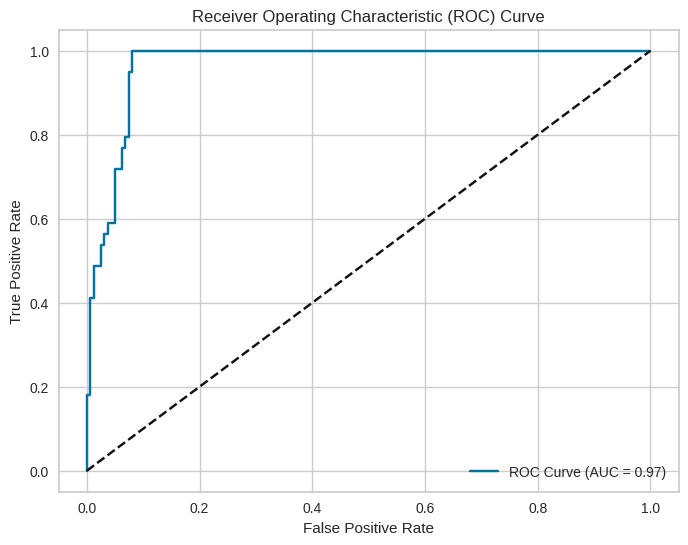

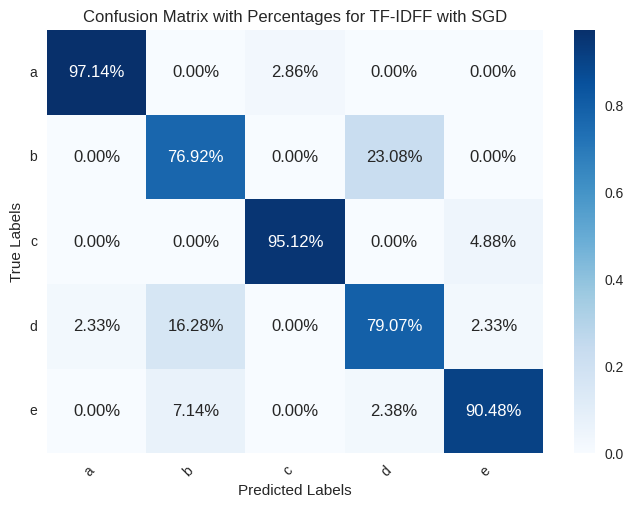

In [178]:
#Machine Learning methods

from sklearn import svm, ensemble, naive_bayes, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming you have the true labels (y_true) and predicted labels (y_pred)


# Assuming you have the X_train and y_train data prepared

# Define a list of models
base_model=SGDClassifier()
sgdmodel=CalibratedClassifierCV(base_model)
models = [
    ('SVM', svm.SVC(probability=True)),
    ('Random Forest', ensemble.RandomForestClassifier()),
    ('Naïve Bayes', naive_bayes.MultinomialNB()),
    ('k-Nearest Neighbor', neighbors.KNeighborsClassifier()),
    ('XG-Boost', xgb.XGBClassifier()),
    ('SGD',sgdmodel)
]


# Iterate over the models
for name, model in models:
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(X_train_tfidf)
    y_pred = model.predict(X_test_tfidf)

    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the model name, accuracy, and confusion matrix
    
    print('Model:', name)
    print('Accuracy:', accuracy_train)
    print('Accuracy:', accuracy)
    # Generate the classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(report)
    y_prob = model.predict_proba(X_test_tfidf)[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(y_test, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print('ROC_AUC:', roc_auc)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    classes = ['a','b','c','d','e']
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the confusion matrix with percentages
    sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.2%', xticklabels=classes, yticklabels=classes, ax=ax)
    # Customize the plot
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix with Percentages for TF-IDFF with '+ name)
    ax.xaxis.set_ticklabels(classes, rotation=45, ha='right')
    ax.yaxis.set_ticklabels(classes, rotation=0)
    plt.show()
    print()

# K-Fold Cross Validation SGD Model with TF/IDF

In [179]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [180]:
def split_data(data,labels):
    X_train_bow, X_tst, y_train, y_pred = train_test_split(data, labels, test_size=0.15, random_state=42)
    return X_train_bow, X_tst, y_train, y_pred

In [181]:
def plot_cros_valid_result(train_score,val_score):
    X_axis = np.arange(len(val_score))
    plt.bar(X_axis-0.2, val_score, 0.4, color='blue', label='Validation')
    plt.bar(X_axis+0.2, train_score, 0.4, color='red', label='Training')
    plt.legend(["Validation", "Training"],loc='best')
    plt.show()

In [182]:
def evaluate_bow(models,data,labels):
    X_train,X_test,y_train,y_test=split_data(data,labels)
    model=models
    results = cross_validate(estimator=model,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       scoring=['accuracy'],
                       return_train_score=True)
    plot_cros_valid_result(results["train_accuracy"],results["test_accuracy"])
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred, y_test)
    print("*"*10, f"{model} Testing Accuracy with TF/IDF = ", acc,"*"*10)

        

In [183]:
models_list=[SVC()
             ,ensemble.RandomForestClassifier()
             ,naive_bayes.MultinomialNB()
             ,KNeighborsClassifier(n_neighbors=5)
             ,xgb.XGBClassifier()
             ,SGDClassifier()]


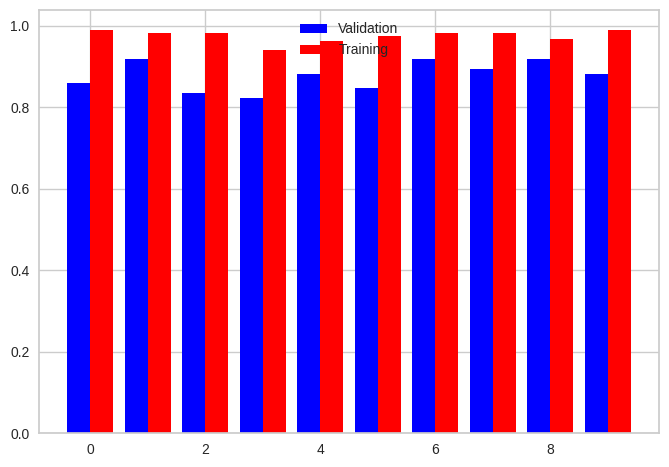

********** SGDClassifier() Testing Accuracy with TF/IDF =  0.84 **********


In [184]:
model=SGDClassifier()
evaluate_bow(model,bow_df,y)